# Neverwinter Combat Analysis
An examination of combat data exported from Neverwinter.

---

## Reading the logs
First lets import everything we will need to do our analysis and then read in the csv file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

no_equip = pd.read_csv('logs/no-equipment.csv', header=None)
with_equip = pd.read_csv('logs/with-equipment.csv', header=None)

In [2]:
def clean_nulls(dataframe):
    df = dataframe.copy()
    for x in range(0, df.columns.size):
        column_name = df.columns[x]
        count = df[column_name].isnull().sum()
        percent = (count / len(df[column_name]) * 100)
        dtype = df[column_name].dtype
        if count > 0:
            if dtype == 'O':
                df[column_name].fillna('NA', inplace=True)
            elif dtype == 'float64':
                df[column_name].fillna(0, inplace=True)
    return df

In [3]:
no_equip = clean_nulls(no_equip)
with_equip = clean_nulls(with_equip)

## Filtering the logs
For our examination we are going to start by looking at the damage that the player (Harkken) dealt during combat. We will need to filter out some of the data in order to accomplish this, since other players and enemies are present in the data as well.

First we will filter the first column by rows that contain the name "Harkken".

Then we need to filter the third column to remove any rows that contain the word "Pet". This prevents us from seeing any damage that Harkken's pet may have dealt during combat.

After that we will filter on the fourth column to make sure that the damage was dealth to an enemy. We can do this by checking to see if the column is empty. If the column is empty, it implies the player injured himslef (a trap, perhaps) and we should filter that out.

Finally we need to filter the last column, column 10, which indicates damage dealt. We filter this to find values that are greater than zero. Anything less than zero implies a heal, and not combat damage.

In [6]:
def get_combat_damage(dataframe):
    df = dataframe.copy()
    df = df[df[4] != '']
    df = df[df[10] > 0]
    df = df[df[0].str.contains("Harkken") == True]
    df = df[df[3].str.contains("Pet") == False]
    df = df[df[9].str.contains("Critical") == False]
    df = df[df[6].str.contains("Electric Shot") == True]
    return df

In [10]:
cmbt_ne = get_combat_damage(no_equip)
cmbt_we = get_combat_damage(with_equip)

In [41]:
print("                  ", "-"*37)
print("                   |   MIN   |     MEAN      |   MAX   |")
print("                  ", "-"*37)
print("WITHOUT EQUIPMENT: |", cmbt_ne[10].min(), "|", cmbt_ne[10].mean(), "|", cmbt_ne[10].max(), "|")
print("   WITH EQUIPMENT: |", cmbt_we[10].min(), "|", cmbt_we[10].mean(), "|", cmbt_we[10].max(), "|")
print("                  ", "-"*37)
print("  DAMAGE INCREASE: | ", cmbt_we[10].min() - cmbt_ne[10].min(),
      "|", cmbt_we[10].mean() - cmbt_ne[10].mean(),
      "| ", cmbt_we[10].max() - cmbt_ne[10].max(), "|")
print("                  ", "-"*37)

                   -------------------------------------
                   |   MIN   |     MEAN      |   MAX   |
                   -------------------------------------
WITHOUT EQUIPMENT: | 479.616 | 609.671437247 | 843.497 |
   WITH EQUIPMENT: | 502.233 | 634.755489362 | 882.413 |
                   -------------------------------------
  DAMAGE INCREASE: |  22.617 | 25.0840521147 |  38.916 |
                   -------------------------------------


TypeError: object of type 'int' has no len()

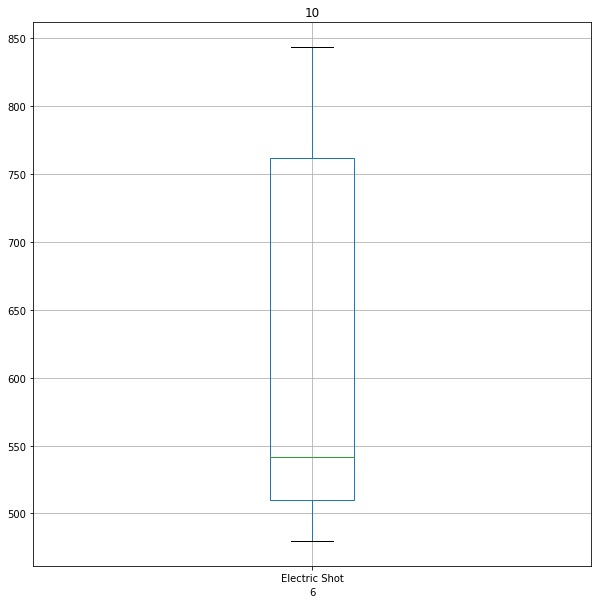

In [11]:
cmbt_ne.boxplot(column=10, by=6, figsize=(10, 10))

TypeError: object of type 'int' has no len()

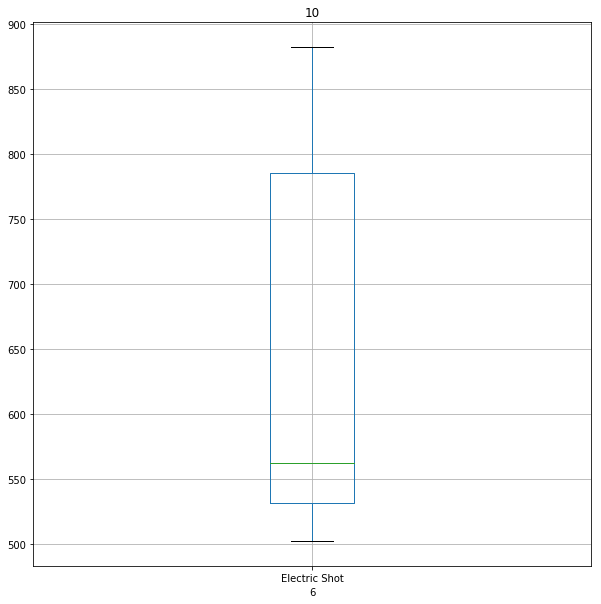

In [12]:
cmbt_we.boxplot(column=10, by=6, figsize=(10, 10))